In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import multiprocessing as mp

In [29]:
plt.rcParams['figure.figsize'] = (15,8)

In [15]:
#Here we process the data
X = np.genfromtxt("binaries/X.np")
X = X.reshape(-1,1)
X = X[0:1000]
X

array([[1.52979840e+18],
       [1.52979852e+18],
       [1.52979882e+18],
       [1.52979912e+18],
       [1.52979942e+18],
       [1.52979972e+18],
       [1.52980002e+18],
       [1.52980032e+18],
       [1.52980062e+18],
       [1.52980092e+18],
       [1.52980122e+18],
       [1.52980152e+18],
       [1.52980182e+18],
       [1.52980212e+18],
       [1.52980242e+18],
       [1.52980272e+18],
       [1.52980302e+18],
       [1.52980332e+18],
       [1.52980362e+18],
       [1.52980392e+18],
       [1.52980422e+18],
       [1.52980452e+18],
       [1.52980482e+18],
       [1.52980512e+18],
       [1.52980542e+18],
       [1.52980572e+18],
       [1.52980602e+18],
       [1.52980632e+18],
       [1.52980662e+18],
       [1.52980692e+18],
       [1.52980722e+18],
       [1.52980752e+18],
       [1.52980782e+18],
       [1.52980812e+18],
       [1.52980842e+18],
       [1.52980872e+18],
       [1.52980902e+18],
       [1.52980932e+18],
       [1.52980962e+18],
       [1.52980992e+18],


In [30]:
#We spawn as many processes as the CPU has cores 
#p= mp.Pool()
#Transformation sec to date
#X = p.map(pd.to_datetime,X)
#p.close()
#p.terminate()

In [23]:
y = np.genfromtxt("binaries/y.np")
y = y[0:1000]
y

array([105.73815754, 103.        ,  98.        ,  96.        ,
        93.        ,  88.        ,  85.        ,  83.        ,
        81.        ,  84.        ,  89.        , 101.        ,
       107.        , 113.        , 121.        , 125.        ,
       125.        , 119.        , 112.        , 102.        ,
        96.        ,  92.        ,  90.        ,  89.        ,
        90.        ,  91.        ,  91.        ,  91.        ,
        89.        ,  89.        ,  87.        ,  84.        ,
        82.        ,  78.        ,  75.        ,  69.        ,
        56.        ,  54.        ,  48.        ,  46.        ,
        49.        ,  55.        ,  55.        ,  55.        ,
        61.        ,  63.        , 103.        , 104.        ,
       105.        , 105.        , 106.        , 117.        ,
       126.        , 140.        , 147.        , 162.        ,
       177.        , 181.        , 182.        , 181.        ,
       180.        , 182.        , 183.        , 186.  

In [17]:
# Fit regression model
#espison permit to take more points in the model = > if epsilon=0 
#he pass perfectly by the points.
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
#We test 3 differents models to compare the accurancy 
#We use fit and predict functions from Sci-kitlearn's SVR.
#We record output data in specific variables
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

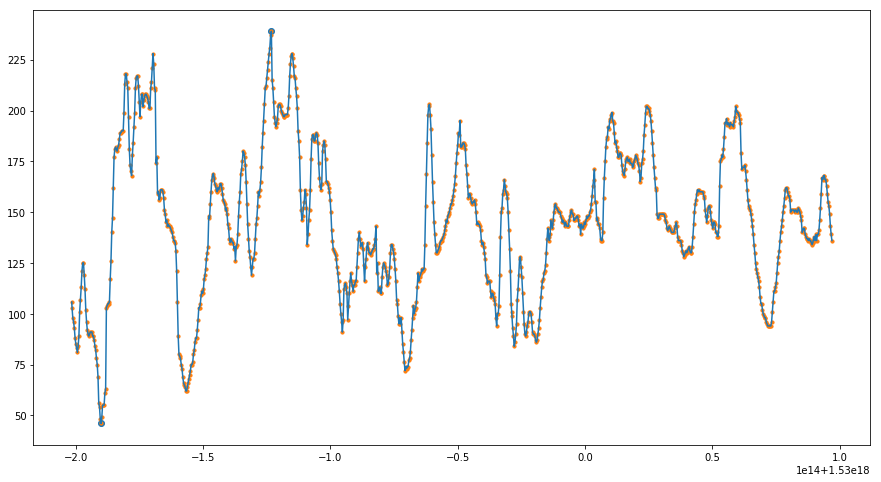

In [31]:
plt.scatter(X[svr.support_], y[svr.support_])
plt.scatter(X, y, s=10)
plt.plot(X, y)

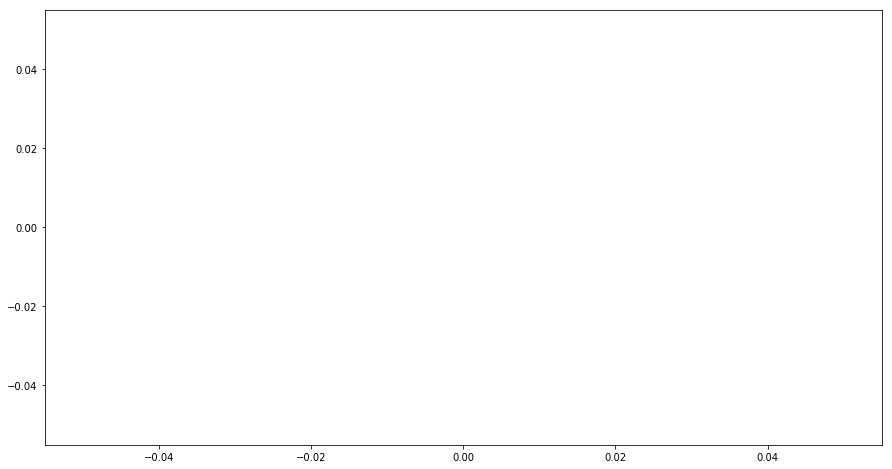

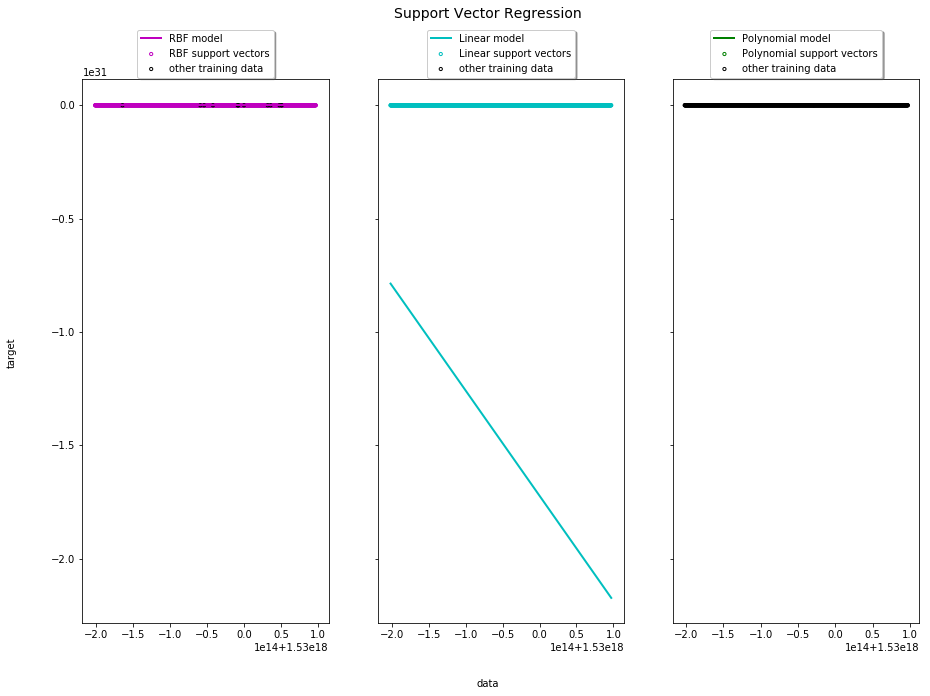

In [22]:
lw = 2

#List creation to use enumerate() on it
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

#we use subplots to display result from 3 kernel
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=10,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=10,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
sb.lineplot([i for i in range(len(X))],svr_rbf.predict(X))
#svr_rbf.predict(X+1)